# Intro to ML Workshop 
## Harvard Open Data Project 

Author: Seth Billiau 

In [39]:
# Basic imports - I'll also import along the way
import qgrid
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint

## EDA 

First things first: always look at your data! Do some basic EDA. I like to use the package sweetviz to automate my EDA for single variable predictors. 


In [2]:
# Import package
from pydataset import data
# Check out datasets
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [3]:
pima = data("Pima.te")
pima.head()

,npreg,glu,bp,skin,bmi,ped,age,type
1,6,148,72,35,33.6,0.627,50,Yes
2,1,85,66,29,26.6,0.351,31,No
3,1,89,66,23,28.1,0.167,21,No
4,3,78,50,32,31.0,0.248,26,Yes
5,2,197,70,45,30.5,0.158,53,Yes


In [4]:
pima.shape

(332, 8)

### importing sweetviz
import sweetviz as sv
#analyzing the dataset
report = sv.analyze(pima)
#display the report
report.show_html('pima.html')

In [5]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.shape

(150, 5)

In [7]:
# This will only work in a jupyter notebook, not jupyter lab
df_widget = qgrid.show_grid(iris, show_toolbar = True)
df_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [447]:
#analyzing the dataset
report = sv.analyze(iris)
#display the report
report.show_html('iris.html')

                                             |          | [  0%]   00:00 -> (? left)

Report iris.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## So we have a dataset... now what? 

We ask questions! 

Iris: 
- Can we use Sepal/Petal features to predict flower species?
- Can we use Sepal length to predict petal length? 

Pima: 
- Can we use demographic features to predict whether or not Akimel Oʼotham Native Americans have diabetes?

The last of these questions is a prediction question which leads us to supervised learning. 

## Train-Test Split

First, we split our dataset into "training" and "testing" data. We set aside our testing dataset - we won't look at again until we've fully trained our models using only the training dataset. We do this for *generalizability*. We want our predictions to perform well on new, out of sample data (future Akimel Oʼotham Native Americans or iris flowers). Setting aside a testing dataset to evaluate our models imitates out of sample data. Let's do that train-test split now. 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# y = iris["Species"]
# X = iris.drop(columns = "Species")

y = pima["type"]
X = pima.drop(columns = "type")


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
# Print training data
X_train, y_train

(     npreg  glu  bp  skin   bmi    ped  age
 323      3  187  70    22  36.4  0.408   36
 289      6   98  58    33  34.0  0.430   43
 140      3  115  66    39  38.1  0.150   28
 276      0  102  78    40  34.5  0.238   24
 264      1  124  60    32  35.8  0.514   21
 ..     ...  ...  ..   ...   ...    ...  ...
 9        3  126  88    41  39.3  0.704   27
 74       7  102  74    40  37.2  0.204   45
 119      2  100  70    52  40.5  0.677   25
 190      8  151  78    32  42.9  0.516   36
 207      0  124  56    13  21.8  0.452   21
 
 [265 rows x 7 columns],
 323    Yes
 289     No
 140     No
 276     No
 264     No
       ... 
 9       No
 74      No
 119     No
 190    Yes
 207     No
 Name: type, Length: 265, dtype: object)

In [12]:
# Print testing data
X_test, y_test

(     npreg  glu   bp  skin   bmi    ped  age
 54       4   97   60    23  28.2  0.443   22
 100      7  181   84    21  35.9  0.586   51
 297      7  142   90    24  30.4  0.128   43
 227      3   96   78    39  37.3  0.238   40
 22       0  180   66    39  42.0  1.893   25
 61       8   84   74    31  38.3  0.457   39
 241      1   88   78    29  32.0  0.365   29
 332      1   93   70    31  30.4  0.315   23
 133      2  120   76    37  39.7  0.215   29
 57       1   88   30    42  55.0  0.496   26
 175      2  127   58    24  27.7  1.600   25
 270     11  138   74    26  36.1  0.557   50
 163      0   84   64    22  35.8  0.545   21
 314      0  126   86    27  27.4  0.515   21
 72      17  163   72    41  40.9  0.817   47
 260      2   82   52    22  28.5  1.699   25
 51       4  144   58    28  29.5  0.287   37
 298      3  169   74    19  29.9  0.268   31
 116      2  128   64    42  40.0  1.101   24
 307     10   94   72    18  23.1  0.595   56
 43      15  136   70    32  37.1 

## Models

Great! Now, let's train our models using the **training data only**.

We'll train a 3 models, 1 parametric and 2 nonparametric 

### Quick aside: Parametric vs. nonparametric models
Parametric methods make distributional assumptions about your data, but give you lots of predictive power if those assumptions are met. Nonparametric models make fewer distributional assumptions making them more flexible. However, most nonparametric models actually have hyperparameters that you have to select.


### Logistic Regression - Classical Model (Stat 111/139/149, CS 109a, CS 181)
Characteristics: 
- Parametric 
- Very interpretable 
- Works well on small/medium-sized datasets
- Goal during training (Objective Function): Maximize the Likelihood 
- Optimization algorithm: Newton's Method 
- Note: Assumes independent observations

Note: Ideally, I would do some kind of analysis of deviance to select an ideal set of predictors for my logistic regression... but I'm not going to do that here.

In [453]:
from sklearn.linear_model import LogisticRegression

In [454]:
# Logistic Regression 
logRegModel = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg',max_iter=1000)

In [455]:
# Fit Logistic Regression
logRegModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [262]:
# Get predictions
logRegPred = logRegModel.predict(X_test)

### k-NN Classifier (CS 109a, CS 181)
Characteristics: 
- Non-parametric
- Very interpretable 
- Works well on small/medium-sized datasets
- Goal during training: predict the class of the nearest neighbors 
    - Choices: How many nearest neighbors? What distance metric? How do you weight neighbors? 

In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [264]:
knnModel = KNeighborsClassifier(n_neighbors=5)

In [265]:
# Fit k-nn Classifier
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [280]:
grid_params = { 
    'n_neighbors': [3,5,7,9,13,20],
    'weights': ["uniform", "distance"],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(), 
    grid_params, 
    verbose = 1, 
    cv = 5, 
    n_jobs = -1
    )

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


In [281]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

In [282]:
knnFinal = gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

### Random Forest (CS 109a, Stat 139, CS 181)
Characteristics: 
- Non-parametric - decision tree based, ensemble method
- Hard to interpret
- Goal during training: Minimize node cross-entropy 
    - Choices: Max Features per tree? Max depth of trees? Hyperparameter tuning is challenging 

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
# Fit Random Forest
randomForestModel = RandomForestClassifier(random_state = 0)

In [285]:
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [287]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [288]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [302]:
rf_random.best_params_
rf_best = rf_random.best_estimator_


In [304]:
# rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=1400)

## Evaluation

Now that have models, we go grab our testing data and start making predictions. Then, we evaluate our predictions using evaluation metrics of our choice. 

In [309]:
# Log Reg Predictions
logRegPred = logRegModel.predict(X_test)

# Get k-NN predictions
knnPred = knnFinal.predict(X_test)

# Random Forest Pred
randomForestPred = rf_best.predict(X_test)

In [310]:
# 0-1 Loss - Low is good
print("Logistic Regression Prediction 0-1 Loss:", np.sum(logRegPred != y_test))
print("k-NN Prediction 0-1 Loss:", np.sum(knnPred != y_test))
print("Random Forest Classifier 0-1 Loss:", np.sum(randomForestPred != y_test)) 

Logistic Regression Prediction 0-1 Loss: 16
k-NN Prediction 0-1 Loss: 16
Random Forest Classifier 0-1 Loss: 18


In [311]:
# F1 Score - High is good
print("Logistic Regression Prediction F1 Score:", sklearn.metrics.f1_score(y_test, logRegPred,  average='micro'))
print("k-NN Prediction F1 Score:", sklearn.metrics.f1_score(knnPred,  y_test, average='micro'))
print("Random Forest Classifier F1 Score:", sklearn.metrics.f1_score(y_test, randomForestPredHyperparamTuning,  average='micro'))

Logistic Regression Prediction F1 Score: 0.7611940298507462
k-NN Prediction F1 Score: 0.7611940298507462
Random Forest Classifier F1 Score: 0.7313432835820896


# Unsupervised Learning

Recall the Iris dataset. Imagine that a helpful florist gave you the dataset, but they totally forgot to label which flower was which. In other words, you have the following dataset: 

Sources: https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering

In [21]:
irisUnlabeled = iris.drop(columns = "Species")

In [22]:
X = irisUnlabeled

The florist wants you to answer the following question: 
- Given these features, can we figure out how many different types of flowers are in our dataset? 
- Once we get a number of flowers, can we group observations into flower types using our predictors? 

These questions call for unsupervised learning. First, let's do some feature engineering.

## Feature Engineering

First, let's standardize our predictors so that they're all on the same scale as one another. This will be important for our two methods K-means and Gaussian Mixture Modeling (GMM). 

In [23]:
# Standardize your dataset
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
47,-1.506521,0.328414,-1.340227,-1.315444
11,-1.264185,0.788808,-1.226552,-1.315444
125,1.643844,0.328414,1.274295,0.790671
13,-1.870024,-0.131979,-1.510739,-1.447076
87,0.553333,-1.743357,0.364896,0.132510


## K-Means

K-means algorithm 
1. Initialize K centroid points randomly 
2. Assign each object to the cluster of the nearest seed point measured with a specific distance metric (in our case Euclidean distance)
3. Compute new seed points as the centroids of the clusters of the current partition 
4. Go back to step 2, stop when no more new assignment. 

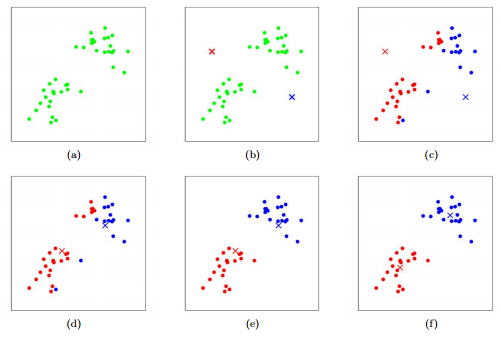

Source: Stat 143 course notes, Image: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html


In [24]:
from sklearn.cluster import KMeans
 
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X_scaled)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 3 3 3 1 1 3 3 3 3 1 3 3 3 1 1 1 1 1 1 1 1 1 3 3 3 1 1 1 3 3 1 1 1 3 3 1
 1 3 1 1 3 3 1 1 3 1 3 1 3 2 0 2 4 0 0 0 4 0 4 4 0 4 0 0 0 0 4 4 4 0 0 0 0
 0 0 0 2 0 4 4 4 4 0 0 0 0 4 0 4 4 0 4 4 4 0 0 0 4 0 2 0 2 0 2 2 4 2 0 2 2
 0 2 0 0 2 2 2 2 4 2 0 2 0 2 2 0 0 0 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([[ 3.08304915e-01, -4.18446566e-01,  5.50565209e-01,
         5.06930168e-01],
       [-7.39124010e-01,  1.45382047e+00, -1.29812473e+00,
        -1.21793897e+00],
       [ 1.30885058e+00,  1.72692711e-01,  1.12384310e+00,
         1.17395260e+00],
       [-1.33793914e+00,  1.48260062e-01, -1.31304341e+00,
        -1.29827488e+00],
       [-3.64080601e-01, -1.41450432e+00,  1.07774588e-01,
         8.77547895e-04]])

## How do we choose k? 

Here, we use the elbow method to choose k. We fit k-Means clustering algorithms for a number of k values and plot the within-cluster sum of squared error. This is a metric of how good our clustering algorithm is. Usually, an elbow appears in this plot, and we choose the value of k at the elbow. Below, we seethat our elbow appears around 3. 

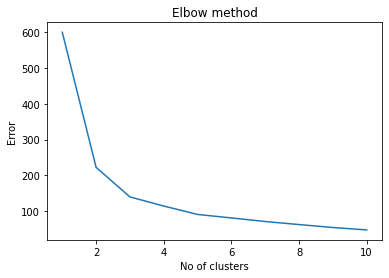

In [25]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [26]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X_scaled)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

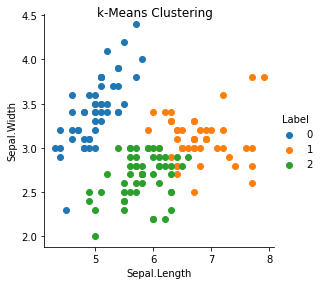

In [27]:
Xcopy = X.copy()
Xcopy["Label"] = y_kmeans3

g = sns.FacetGrid(Xcopy, hue="Label", height=4) \
   .map(plt.scatter, "Sepal.Length", "Sepal.Width") \
   .add_legend() \
   .fig.suptitle('k-Means Clustering');

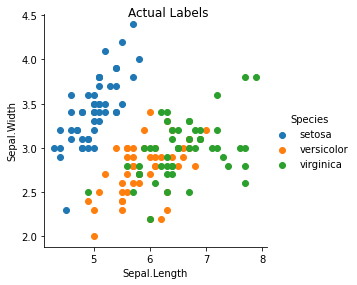

In [28]:
import seaborn as sns
sns.FacetGrid(iris, hue="Species", height=4) \
   .map(plt.scatter, "Sepal.Length", "Sepal.Width") \
   .add_legend() \
   .fig.suptitle('Actual Labels');

## Another approach is Gaussian Mixture Modeling 
GMMs assume that you have n clusters that come n multivariate normal distributions. To find the parameters of these multivariate normals, we use an Expectation-Maximization algorithm. The upshot of GMMs relative to K-means is that we can get uncertainty. We can now answer questions, given a datapoint $x_n$, what's the probability that it came from cluster $k$. 

Source: https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=50, random_state =0)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 0.98, 'Gaussian Mixture Models')

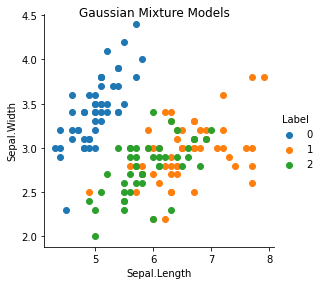

In [34]:
Xcopy = X.copy()
Xcopy["Label"] = y_cluster_gmm
g = sns.FacetGrid(Xcopy, hue="Label", height=4) \
   .map(plt.scatter, "Sepal.Length", "Sepal.Width") \
   .add_legend();
g.fig.suptitle('Gaussian Mixture Models')

Like we mentioned, the upshot for GMMs is that you get uncertainty estimation for your probabilities of being in each cluster.  

In [40]:
y_scores = gmm.predict_proba(X_scaled)
pprint(np.round(y_scores,3))

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.

Note that neither k-Means nor GMM gives you any insight into what the clusters actually mean. It's your job to use your domain knowledge to acertain what is actually going on with these clusters/make interpretations. 

Sources:
- Course notes from previous classes including but not limited to Stat 111, 139, 143, 149, 195; CS 109a/b, CS 181; MIT 6.036 
- Shoutout to Medium, pay $50 for a subscription it's lit
- Iris dataset exploration, https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering
- GMMs, https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95